# Ololade Adetula
# Neural Networking with TensorFLow and Sequential model to generate replica code of basic regression of fuel efficiency prediction. 

In [ ]:
# Importing environment supporting tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
# Packages implemented 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pip install pandas
import tensorflow as tf

# Clearer Numpy outputs
np.set_printoptions(precision=3, suppress=True)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [7]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data' # https://archive.ics.uci.edu/ml/datasets/Auto+MPG
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

In [8]:
dataset.tail()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1

In [9]:
dataset = dataset.dropna() # removing zeros and null values in produce clean data

# convert categorical 'Origin' data into one-hot data
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

In [10]:
dataset.tail() # new data set

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  USA  Europe  Japan  
393          82    1       0      0  
394          82    0       1      0  
395          82    1       0      0  
396          82    1       0      0  
397          82    1       0      0

In [11]:
# creating testing and training sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (314, 10) (78, 10)


count         mean         std     min      25%     50%  \
MPG           314.0    23.310510    7.728652    10.0    17.00    22.0   
Cylinders     314.0     5.477707    1.699788     3.0     4.00     4.0   
Displacement  314.0   195.318471  104.331589    68.0   105.50   151.0   
Horsepower    314.0   104.869427   38.096214    46.0    76.25    94.5   
Weight        314.0  2990.251592  843.898596  1649.0  2256.50  2822.5   
Acceleration  314.0    15.559236    2.789230     8.0    13.80    15.5   
Model Year    314.0    75.898089    3.675642    70.0    73.00    76.0   
USA           314.0     0.624204    0.485101     0.0     0.00     1.0   
Europe        314.0     0.178344    0.383413     0.0     0.00     0.0   
Japan         314.0     0.197452    0.398712     0.0     0.00     0.0   

                  75%     max  
MPG             28.95    46.6  
Cylinders        8.00     8.0  
Displacement   265.75   455.0  
Horsepower     128.00   225.0  
Weight        3608.00  5140.0  
Acceleration    17.20    24.8  
Model Year      79.00    82.0  
USA              1.00     1.0  
Europe           0.00     1.0  
Japan            0.00     1.0

In [12]:
# Labels produce new features through splitting
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [13]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()

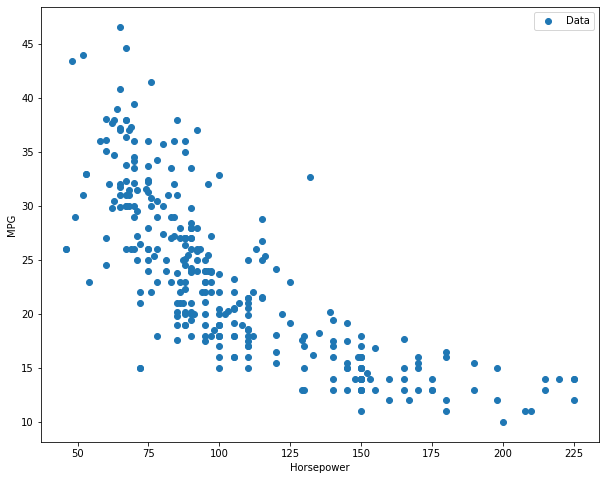

In [14]:
plot('Horsepower') # Feature 1

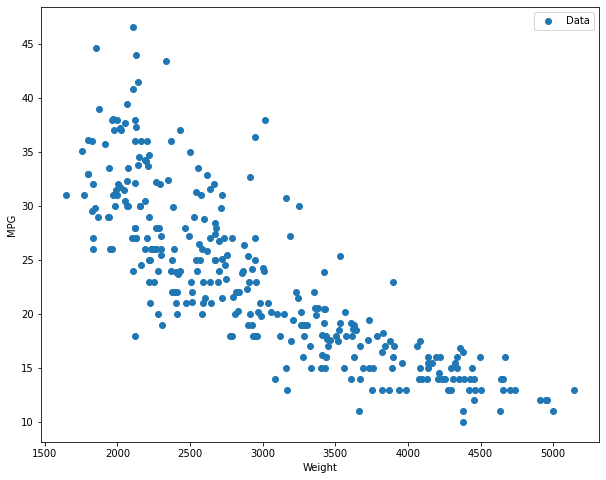

In [15]:
plot('Weight') # Feature 2

In [17]:
# Reorganizing the data
print(train_dataset.describe().transpose()[['mean', 'std']])

#  Data  Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712
[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
    0.197]


In [18]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [22]:
# Regression
 # 1. Normalize the horsepower features
 # 2. Apply a linear transformation (y = m*x+b) to produce 1 output using layers.Dense

feature = 'Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Data Normalization
single_feature_normalizer = preprocessing.Normalization()

# adapt to the data
single_feature_normalizer.adapt(single_feature)

(314,) (314, 9)


In [23]:
# Sequential model
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1) # Linear Model Regression 
])

In [24]:
single_feature_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [25]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # MeanSquaredError
optim = keras.optimizers.Adam(lr=0.1)

single_feature_model.compile(optimizer=optim, loss=loss)

In [26]:
history = single_feature_model.fit(
    train_features[feature], train_labels,
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 30ms/step - loss: 22.8746 - val_loss: 22.9301
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 22.0649 - val_loss: 22.1304
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 21.2626 - val_loss: 21.3305
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 20.4625 - val_loss: 20.5305
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 19.6630 - val_loss: 19.7305
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 18.8656 - val_loss: 18.9303
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 18.0650 - val_loss: 18.1303
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 17.2669 - val_loss: 17.3307
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 16.4638 - val_loss: 16.5309
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 15.6646 - val_loss: 15.7310
Epoch

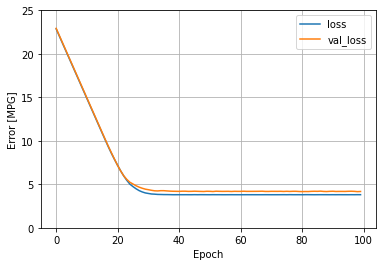

In [27]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [28]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

3/3 [==============================] - 0s 16ms/step - loss: 3.6535


3.6534581184387207

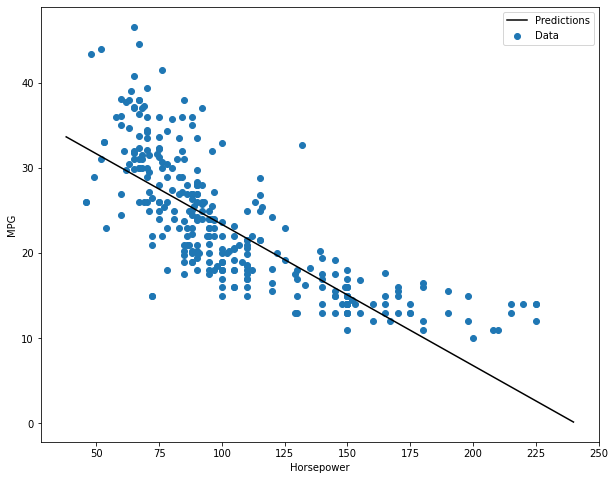

In [29]:
# prediction
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)
# Plot of new features
plot(feature, x,y)

In [30]:
# Deep Neural Networking
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [31]:
dnn_model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [32]:
dnn_model.fit(
    train_features[feature], train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 28ms/step - loss: 23.1184 - val_loss: 23.4752
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 22.8437 - val_loss: 23.1808
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 22.5650 - val_loss: 22.8625
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 22.2400 - val_loss: 22.4783
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 21.8378 - val_loss: 21.9887
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 21.3144 - val_loss: 21.3656
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 20.6490 - val_loss: 20.5751
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 19.8110 - val_loss: 19.5738
Epoch 9/100
8/8 [==============================] - 0s 13ms/step - loss: 18.7583 - val_loss: 18.4103
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 17.6094 - val_loss: 17.1353
Ep

In [33]:
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 2.9962


2.9962339401245117

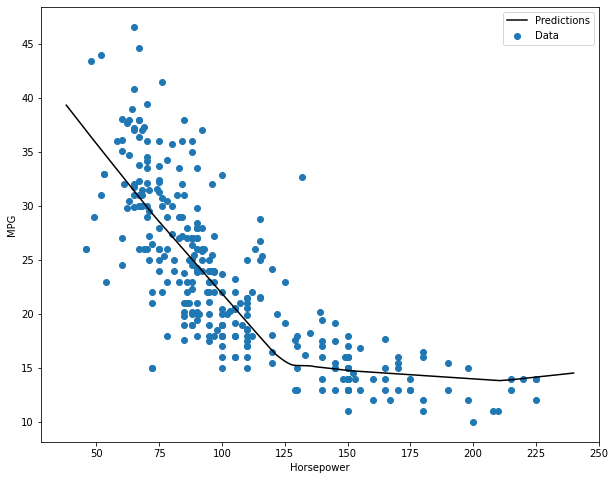

In [34]:
# prediction
x = tf.linspace(range_min, range_max, 200)
y = dnn_model.predict(x)
# Plot new features with prediction
plot(feature, x,y)

In [35]:
# multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss)

In [36]:
linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 25ms/step - loss: 22.9506 - val_loss: 22.9974
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 22.0630 - val_loss: 22.2919
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 21.2259 - val_loss: 21.5781
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 20.4071 - val_loss: 20.8370
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 19.5825 - val_loss: 20.1105
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 18.7970 - val_loss: 19.3990
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 17.9480 - val_loss: 18.6812
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 17.1278 - val_loss: 17.9446
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 16.3200 - val_loss: 17.2069
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 15.5129 - val_loss: 16.4912
Epoc

In [37]:
linear_model.evaluate(
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 2.5095


2.509455919265747